# Autoregression Model
An autoregression model is a linear regression model that uses __lagged__ variables as input variables.

We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use.

Alternately, the statsmodels library provides an autoregression model that __automatically selects an appropriate lag__ value using statistical tests and trains a linear regression model. It is provided in the AR class.



## Autoregression vs Linear Regression

A common approach to model time series is to regard the label at current time step $X_{t}$ as a variable dependent on previous time steps $X_{t-k}$

An autoregressive model is when a value from a time series is regressed on previous values from that same time series. 

> Autoregression modeling is a modeling technique used for time series data that assumes linear continuation of the series so that 

    - previous values in the time series can be used to predict futures values.  

With a linear regression model, you’re taking all of the previous data points to build a model to predict a future data point using a simple linear model. y = a + b*X

With the autoregression model, you are using previous data points and using them to predict future data point(s) but with __multiple lag variables.__


for example, $ y_t$ on $y_{t−1}$ : 

$$ y_t = β_0 + β_1.y_{t−1} + ϵ_t.$$

In this regression model, 
- the response variable in the previous time period has become the predictor 
- the errors have usual assumptions about errors in a simple linear regression model. 

The order of an autoregression is the number of immediately preceding values in the series that are used to predict the value at the present time. 

So, the preceding model is a first-order autoregression, written as AR(1).

If we want to predict y this year ($y_t$) using measurements of global temperature in the previous two years ($y_{t−1}, y_{t−2}$), then the autoregressive model for doing so would be:

$$ y_t = β_0 + β_1.y_{t−1} + β_2.y_{t−2} + ϵ_t.$$

This model is a second-order autoregression, written as AR(2), since the value at time t is predicted from the values at times t−1 and t−2

More generally, a $k^{th}$-order autoregression, written as AR(k), is a multiple linear regression in which the value of the series at any time t is a (linear) function of the values at times t−1,t−2,…,t−k

** Assumptions: **

- The previous time step(s) is useful in predicting the value at the next time step (dependance between values)
- Your data is stationary. A time series is stationary if is mean (and/or variance) is constant over time. 

In [87]:
import sys
import pandas as pd
import numpy as np
from numpy import log
from pandas import Series

from statsmodels.tsa.stattools import adfuller

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from sklearn.metrics import mean_squared_error

In [88]:
location = r'E:\\MYLEARN\2-ANALYTICS-DataScience\datasets\daily-minimum-temperatures-in-me.csv'
# location = r'E:\datasets\daily-minimum-temperatures-in-me.csv'

In [89]:
# load data
temp_data = pd.read_csv(location)

# set date column as index
temp_data['Date']=pd.to_datetime(temp_data['Date'])
temp_data.set_index('Date', inplace=True)

In [90]:
temp_data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [91]:
#series = Series.from_csv(location, header=0)

In [92]:
# print(series.shape)
# print(series.dtype)

In [93]:
temp_data.dtypes

Temp    object
dtype: object

In [94]:
temp_data = temp_data.apply(pd.to_numeric, errors='coerce')

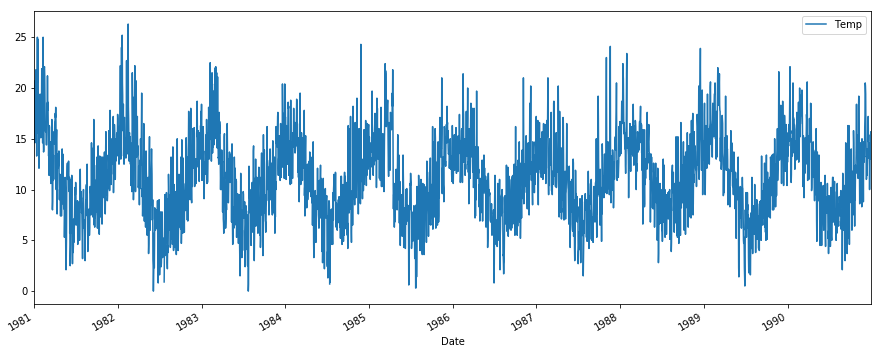

In [95]:
temp_data.plot();

## STEP 1- Quick Check for Autocorrelation

### method 1 - using pandas lag_plot **

__ What is a Lag Plot?__

A visual method for checking correlation is to use pandas lag_plot() function to see how well the values of the original sales data are correlated with each other. If they are highly correlated, we’ll see a fairly close grouping of datapoints that align along some point/line on the plot.

A lag plot is a special type of scatter plot with the two variables (X,Y) “lagged.”

    - A “lag” is a fixed amount of passing time; 
    - One set of observations in a time series is plotted (lagged) against a second, later set of data. 
    - The kth lag is the time period that happened “k” time points before time i. 
        - For example:
            Lag1(Y2) = Y1 and Lag4(Y9) = Y5.
            The most commonly used lag is 1, called a first-order lag plot.

Plots with a single plotted lag are the most common. However, it is possible to create a lag plot with multiple lags with separate groups (typically different colors) representing each lag.

Lag plots allow you to check for:

    - Model suitability.
    - Outliers (data points with extremely high or low values).
    - Randomness (data without a pattern).
    - Serial correlation (where error terms in a time series transfer from one period to another).
    - Seasonality (periodic fluctuations in time series data that happens at regular periods).
    
(1)  ** Model suitability **

    The shape of the lag plot can provide clues about the underlying structure of your data. 
    
    For example: 
    
        A linear shape to the plot suggests that an autoregressive model is probably a better choice.
  
(2)  ** Outliers ** 

    Outliers are easily discernible on a lag plot.

![lag_plot1.GIF](attachment:lag_plot1.GIF)
    
(3) ** Randomness **


    Creating a lag plot enables you to check for randomness. 
    Random data will spread fairly evenly both horizontally and vertically. 
    If you cannot see a pattern in the graph, your data is most probably random.
    
> Random plots mean that there is no autocorrelation_

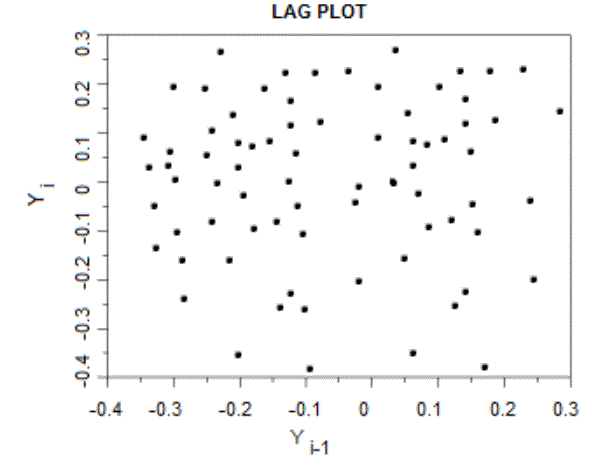


(4) ** Serial Correlation / Autocorrelation **

If your data shows a linear pattern, it suggests autocorrelation is present. 

A __positive__ linear trend (i.e. going upwards from left to right) is suggestive of positive autocorrelation; 

a __negative__ linear trend (going downwards from left to right) is suggestive of negative autocorrelation. 

The tighter the data is clustered around the diagonal, the more autocorrelation is present; 

perfectly autocorrelated data will cluster in a single diagonal line.

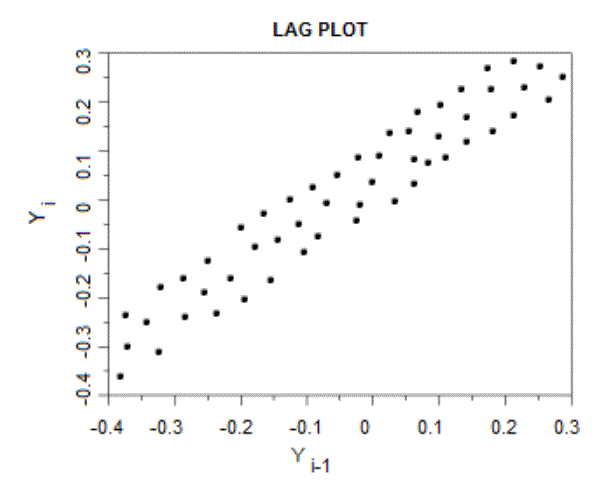

"Lag plot suggestive of moderate positive autocorrelation."


(5) ** Seasonality **



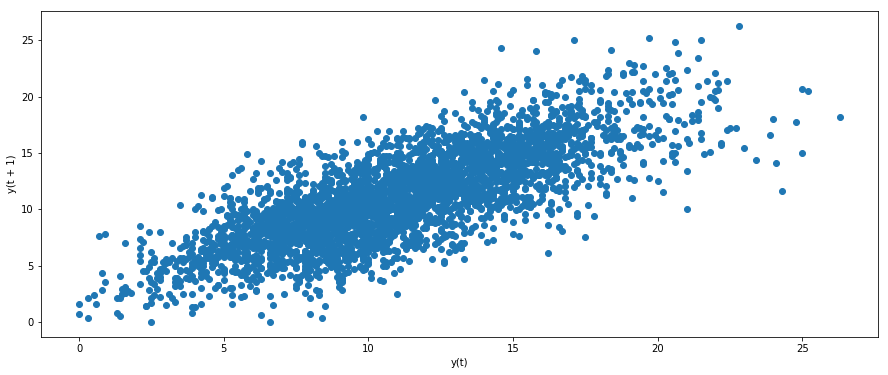

In [117]:
from pandas.plotting import lag_plot

lag_plot(temp_data);

plots the temperature data (t) on the x-axis against the temperature on the previous day (t-1) on the y-axis.

We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

### method 2 -  using corr()

In [97]:
values    = pd.DataFrame(temp_data.values)
values.head()

,0
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [98]:
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.head()

,0,0
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [99]:
# rename columns
dataframe.columns = ['t-1', 't+1']
dataframe.head()

,t-1,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [100]:
result = dataframe.corr()
print(result)

        t-1     t+1
t-1  1.0000  0.7731
t+1  0.7731  1.0000


... pandas shift

DataFrame.shift(self, periods=1, freq=None, axis=0, fill_value=None)

Shift index by desired number of periods with an optional time freq.

In [101]:
# Creating row index values for our data frame 
# We have taken time frequency to be of 12 hours interval 
# We are generating five index value using "period = 5" parameter 
   
ind = pd.date_range('01 / 01 / 2000', periods = 5, freq ='12H') 
   
# Creating a dataframe with 4 columns 
# using "ind" as the index for our dataframe 
df = pd.DataFrame({"A":[1, 2, 3, 4, 5],  
                   "B":[10, 20, 30, 40, 50], 
                   "C":[11, 22, 33, 44, 55], 
                   "D":[12, 24, 51, 36, 2]},  
                    index = ind) 
  
# Print the dataframe 
df 

,A,B,C,D
2000-01-01 00:00:00,1,10,11,12
2000-01-01 12:00:00,2,20,22,24
2000-01-02 00:00:00,3,30,33,51
2000-01-02 12:00:00,4,40,44,36
2000-01-03 00:00:00,5,50,55,2


Lets use the dataframe.shift() function to shift the index axis by 2 periods in positive direction

In [102]:
# shift index axis by two periods in positive direction 
# axis = 0 is set by default 
df.shift(2, axis = 0) 


,A,B,C,D
2000-01-01 00:00:00,NaN,NaN,NaN,NaN
2000-01-01 12:00:00,NaN,NaN,NaN,NaN
2000-01-02 00:00:00,1.0,10.0,11.0,12.0
2000-01-02 12:00:00,2.0,20.0,22.0,24.0
2000-01-03 00:00:00,3.0,30.0,33.0,51.0


In [103]:
# shift index axis by two periods in negative direction 
# axis = 0 is set by default 
df.shift(-2, axis = 0) 

,A,B,C,D
2000-01-01 00:00:00,3.0,30.0,33.0,51.0
2000-01-01 12:00:00,4.0,40.0,44.0,36.0
2000-01-02 00:00:00,5.0,50.0,55.0,2.0
2000-01-02 12:00:00,NaN,NaN,NaN,NaN
2000-01-03 00:00:00,NaN,NaN,NaN,NaN


In [104]:
# shift column axis by two periods in positive direction 
df.shift(2, axis = 1) 

,A,B,C,D
2000-01-01 00:00:00,NaN,NaN,1.0,10.0
2000-01-01 12:00:00,NaN,NaN,2.0,20.0
2000-01-02 00:00:00,NaN,NaN,3.0,30.0
2000-01-02 12:00:00,NaN,NaN,4.0,40.0
2000-01-03 00:00:00,NaN,NaN,5.0,50.0


In [105]:
# shift column axis by two periods in negative direction 
df.shift(-2, axis = 1) 

,A,B,C,D
2000-01-01 00:00:00,11.0,12.0,NaN,NaN
2000-01-01 12:00:00,22.0,24.0,NaN,NaN
2000-01-02 00:00:00,33.0,51.0,NaN,NaN
2000-01-02 12:00:00,44.0,36.0,NaN,NaN
2000-01-03 00:00:00,55.0,2.0,NaN,NaN


In [106]:
df.shift(1)

,A,B,C,D
2000-01-01 00:00:00,NaN,NaN,NaN,NaN
2000-01-01 12:00:00,1.0,10.0,11.0,12.0
2000-01-02 00:00:00,2.0,20.0,22.0,24.0
2000-01-02 12:00:00,3.0,30.0,33.0,51.0
2000-01-03 00:00:00,4.0,40.0,44.0,36.0


In [107]:
# in our code example ...
pd.concat([df.shift(1), df], axis=1)

,A,B,C,D,A,B,C,D
2000-01-01 00:00:00,NaN,NaN,NaN,NaN,1,10,11,12
2000-01-01 12:00:00,1.0,10.0,11.0,12.0,2,20,22,24
2000-01-02 00:00:00,2.0,20.0,22.0,24.0,3,30,33,51
2000-01-02 12:00:00,3.0,30.0,33.0,51.0,4,40,44,36
2000-01-03 00:00:00,4.0,40.0,44.0,36.0,5,50,55,2


... back to the main code

This is a good confirmation for the plot above.

It shows a strong positive correlation (0.77) between the observation and the lag=1 value.

let us try with other lag values of 2,3,4,5,6....

In [108]:
values.shape

(3650, 1)

In [109]:
lag_values = list(range(50))
#print(lag_values)

In [110]:
corr_val_list =[]

for lag_value in lag_values:
    dataframe = pd.concat([values.shift(lag_value), values], axis=1)    
    result    = dataframe.corr()
    corr_val  = result.values[0][1]    

    corr_val_list.append(corr_val)

# print(corr_val_list)

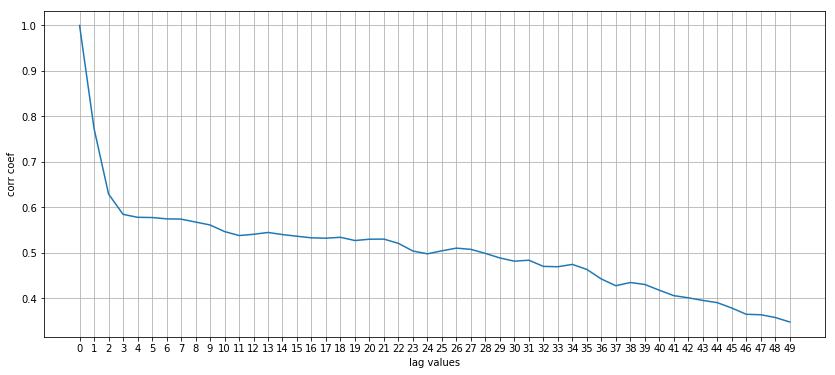

In [111]:
plt.figure(figsize=(14, 6))
plt.grid()
plt.plot(lag_values, corr_val_list);

plt.ylabel('corr coef')
plt.xlabel('lag values')

plt.xticks(np.arange(min(lag_values), max(lag_values)+1, 1));

### with lag of 7 days

In [112]:
df_values = pd.DataFrame(values.values)

In [113]:
lags = 7

In [114]:
columns = [values]

In [115]:
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
    
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
    
dataframe.columns = columns

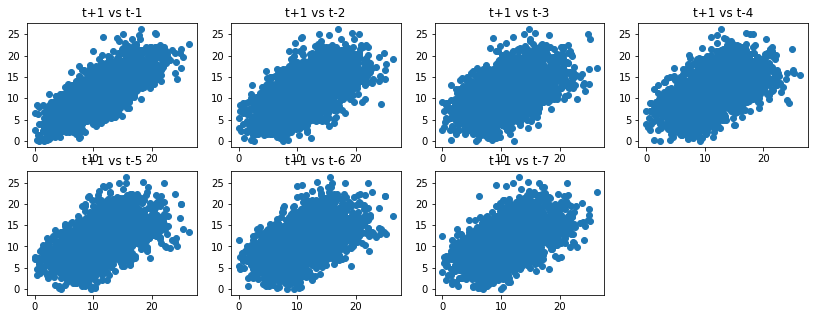

In [116]:
plt.figure(figsize=(14, 5))

for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
    
	ax.set_title('t+1 vs t-' + str(i))
    
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)

### method 3 -  using autocorrelation plots

we don’t want to just rely on a visual representation of correlation though, so we’ll use the idea of autocorrelation plots to look at correlations of our data.

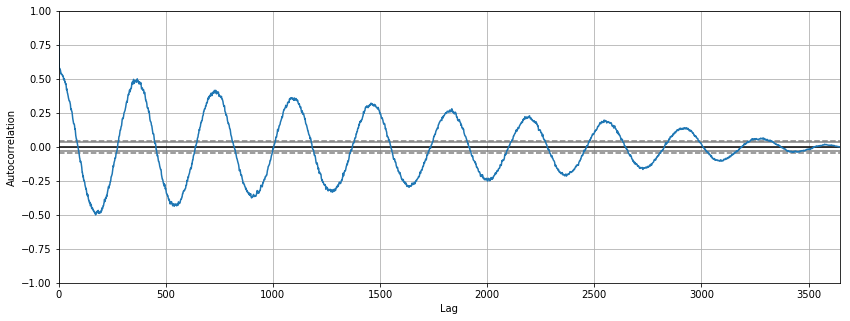

In [60]:
plt.figure(figsize=(14, 5))
pd.plotting.autocorrelation_plot(temp_data['Temp'].dropna());

- The resulting plot shows lag along the x-axis and the correlation on the y-axis. 

- Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

- We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. 

- This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. 

- Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

# Prediction

- predict the last 7 days of minimum temperatures in the dataset given all prior observations.

- develop a test harness for the problem by splitting the observations into training and test sets, with only the last 7 observations in the dataset assigned to the test set as “unseen” data that we wish to predict.



In [61]:
# create lagged dataset
values    = pd.DataFrame(temp_data.values)

# values.sample(10)

In [62]:
dataframe = pd.concat([values.shift(1), values], axis=1)

dataframe.columns = ['t-1', 't+1']

dataframe.head()

,t-1,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


In [63]:
# split into train and test sets
X = dataframe.values

train, test = X[1:len(X)-7], X[len(X)-7:]

X_train, y_train = train[:, 0], train[:, 1]
X_test,  y_test  =  test[:, 0],  test[:, 1]

Explanation ...

In [64]:
X[:5]

array([[ nan, 20.7],
       [20.7, 17.9],
       [17.9, 18.8],
       [18.8, 14.6],
       [14.6, 15.8]])

In [65]:
X[1:len(X)-7]

array([[20.7, 17.9],
       [17.9, 18.8],
       [18.8, 14.6],
       ...,
       [13.1, 13.2],
       [13.2, 13.9],
       [13.9, 10. ]])

In [66]:
X[len(X)-7:]

array([[10. , 12.9],
       [12.9, 14.6],
       [14.6, 14. ],
       [14. , 13.6],
       [13.6, 13.5],
       [13.5, 15.7],
       [15.7, 13. ]])

In [67]:
len(X_train), len(y_train), len(X_test), len(y_test)

(3642, 3642, 7, 7)

In [70]:
# persistence model
def model_persistence(x):
    return x

In [71]:
for x in X_test:
    print(x)

10.0
12.9
14.6
14.0
13.6
13.5
15.7


In [72]:
# walk-forward validation
predictions = list()

for x in X_test:
    yhat = model_persistence(x)
    
    predictions.append(yhat)

predictions

[10.0, 12.9, 14.6, 14.0, 13.6, 13.5, 15.7]

In [74]:
X_test

array([10. , 12.9, 14.6, 14. , 13.6, 13.5, 15.7])

In [31]:
y_test

array([12.9, 14.6, 14. , 13.6, 13.5, 15.7, 13. ])

Test MSE: 3.423


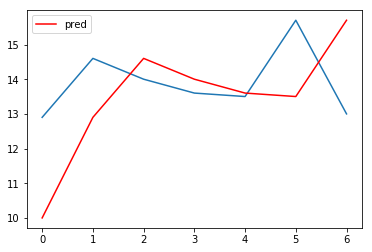

In [75]:
test_score = mean_squared_error(y_test, predictions)

print('Test MSE: %.3f' % test_score)

# plot predictions vs expected
plt.plot(y_test)
plt.plot(predictions, color='red', label='pred')
plt.legend()

In [76]:
temp_data = temp_data.dropna()

In [77]:
# split dataset
X = temp_data.values

train, test = X[1:len(X)-7], X[len(X)-7:]

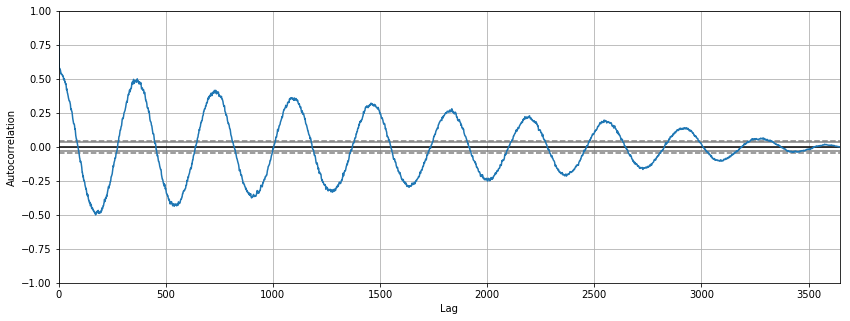

In [80]:
# Pandas method for auto correlation plot
plt.figure(figsize=(14, 5))

pd.plotting.autocorrelation_plot(temp_data['Temp']);

lag of 30 seems the right value 

<Figure size 1008x360 with 0 Axes>

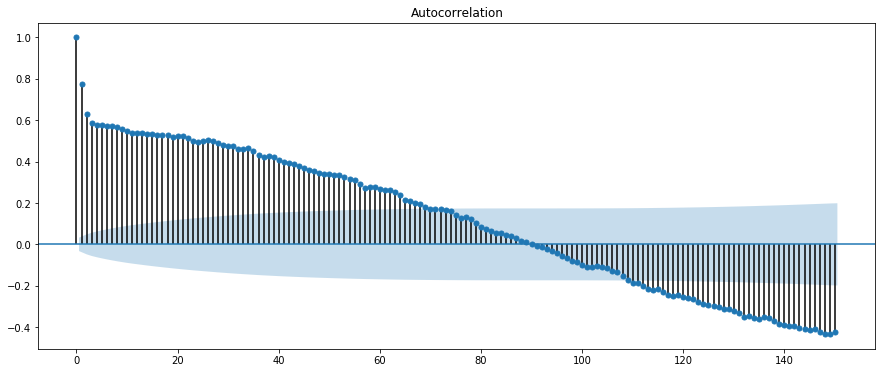

In [86]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(14, 5))
plot_acf(temp_data['Temp'], lags=150);

### train autoregression

In [119]:
from statsmodels.tsa.ar_model import AR

AR.fit(__maxlag=None__, 
method='cmle', 
ic=None, 
trend='c', 
transparams=True, 
start_params=None, solver='lbfgs', maxiter=35, full_output=1, disp=1, callback=None, **kwargs)[source]¶

In [118]:
model     = AR(train)
model_fit = model.fit()

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 29
Coefficients: [ 0.55974632  0.58709415 -0.09246698  0.05085627  0.03908131  0.04156931
  0.02416716  0.04398952  0.01499416  0.03491271  0.00079989  0.00560537
  0.01592083  0.02563525  0.0019312   0.0257546   0.00842032  0.0099442
  0.03284872 -0.00944755  0.02473185  0.01840579  0.01422356 -0.01669205
 -0.00127444  0.01253475  0.0206685   0.01062753  0.00137506  0.00296821]


chosen optimal lag and the list of coefficients in the trained linear regression model.

This is interesting given how close this lag is to the average number of days in a month.

In [129]:
# make predictions
predictions = model_fit.predict(start=len(train), 
                                end=len(train)+len(test)-1, 
                                dynamic=False)

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=11.897334, expected=12.900000
predicted=13.065633, expected=14.600000
predicted=13.542059, expected=14.000000
predicted=13.282815, expected=13.600000
predicted=13.118024, expected=13.500000
predicted=13.152012, expected=15.700000
predicted=13.157325, expected=13.000000
Test MSE: 1.476


7 day forecast and the mean squared error of the forecast 

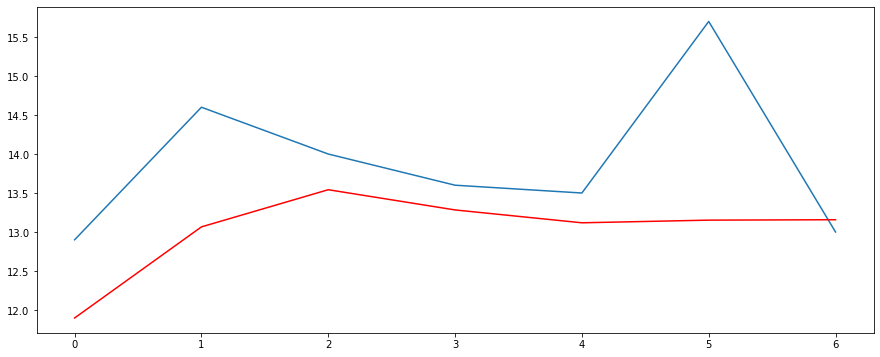

In [130]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red');